In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#set visualization theme
sns.set()

In [2]:
#import data set
df = pd.read_csv("../data/Jewelry_Dataset.csv")

#structure the columns
df.columns = [
    "Order_Datetime",
    "Order_id",
    "Product_id",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

In [3]:
#View data
df.head(5)


,Order_Datetime,Order_id,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [4]:
# Strip spaces and standardize capitalization and underscores
df.columns = [col.strip().replace(" ", "_").replace("-", "_").title() for col in df.columns]

# Display cleaned column names
print(df.columns)

Index(['Order_Datetime', 'Order_Id', 'Product_Id', 'Sku_Quantity',
       'Category_Id', 'Category', 'Brand_Id', 'Price_Usd', 'User_Id',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')


In [5]:
# Rename 'Order_Id' to 'Order_ID'
df.rename(columns={'Order_Id': 'Order_ID'}, inplace=True)

In [6]:
# Rename 'Product_Id' to 'Product_ID'
df.rename(columns={'Product_Id': 'Product_ID'}, inplace=True)

In [7]:
# Rename 'Category_Id' to 'Category_ID'
df.rename(columns={'Category_Id': 'Category_ID'}, inplace=True)

In [8]:
# Rename 'Brand_Id' to 'Branch_ID'
df.rename(columns={'Brand_Id': 'Branch_ID'}, inplace=True)

In [9]:
# Rename 'Price_Usd' to 'Price_USD'
df.rename(columns={'Price_Usd': 'Price_USD'}, inplace=True)

In [10]:
# Rename 'User_Id' to 'User_ID'
df.rename(columns={'User_Id': 'User_ID'}, inplace=True)

In [11]:
df.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'Sku_Quantity',
       'Category_ID', 'Category', 'Branch_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

# Exploratory Data Analysis

In [13]:
#Check for missing values
df.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
Sku_Quantity          0
Category_ID        5352
Category           9933
Branch_ID          4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [14]:
# Amount of total data
df.shape

(95910, 13)

In [15]:
#Feature cardinality- how many unique value a column can take
df.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
Sku_Quantity          1
Category_ID          25
Category            218
Branch_ID          2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [16]:
#data description of the data
df.describe()

,Order_ID,Product_ID,Sku_Quantity,Category_ID,Branch_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [17]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   Sku_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Branch_ID       91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [18]:
#Duplicate value
num_duplicated = len(df.loc[df.duplicated()])

In [19]:
#Print num of duplicated records
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [20]:
#Features with a cardinality of i (invariant features- nothing needed to learn about this feature)

invariant_features = df.nunique()[df.nunique() == 1].index.tolist()

In [21]:
invariant_features

['Sku_Quantity']

In [22]:
df.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'Sku_Quantity',
       'Category_ID', 'Category', 'Branch_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [23]:
#Check for label distribution- looking for skew distribution
df["Price_USD"].skew()

18.95906072625981

In [24]:
#Price Kurtosis
df["Price_USD"].kurtosis()

1054.8979068506155

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


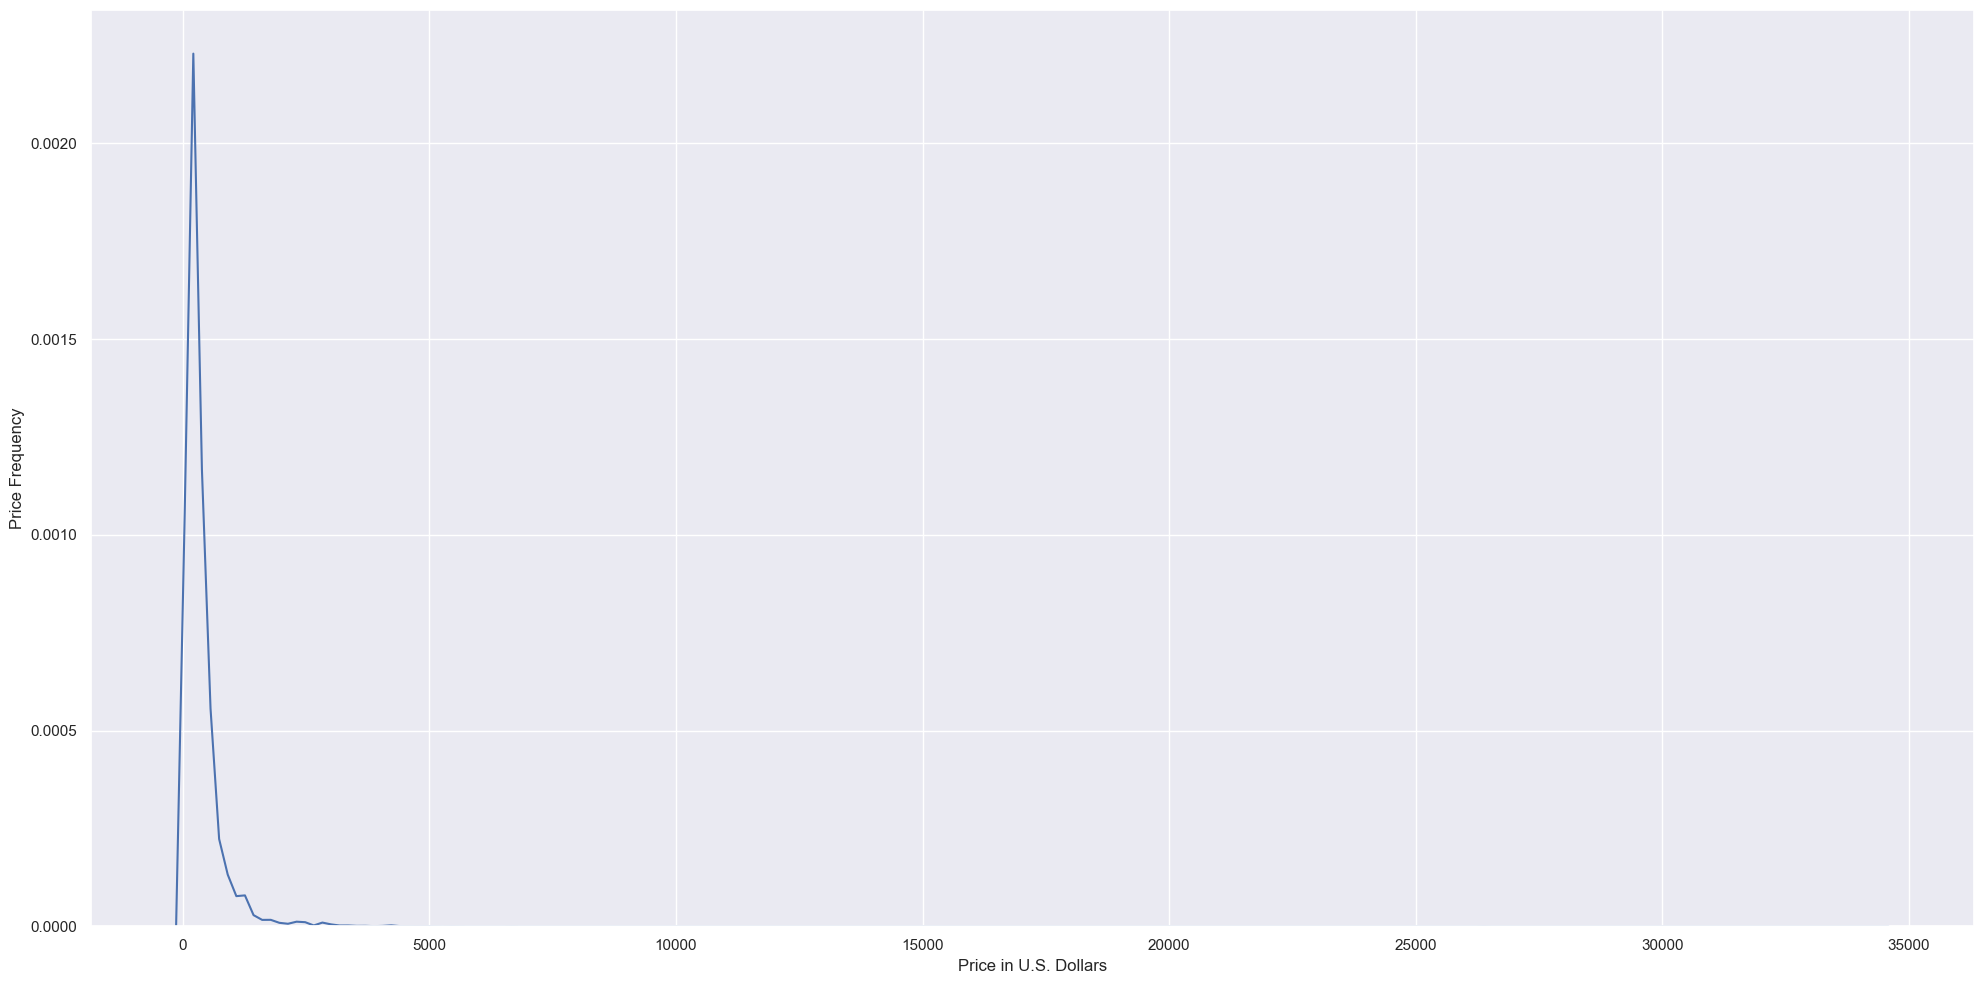

In [25]:
#Visualize price distribution by plotting 
plt.figure(figsize = (20,10))

sns.kdeplot(df, x = "Price_USD")

plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(); plt.close()

In [26]:
# Target gender analysis
df["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [27]:
# Target gender analysis- normalize
df["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

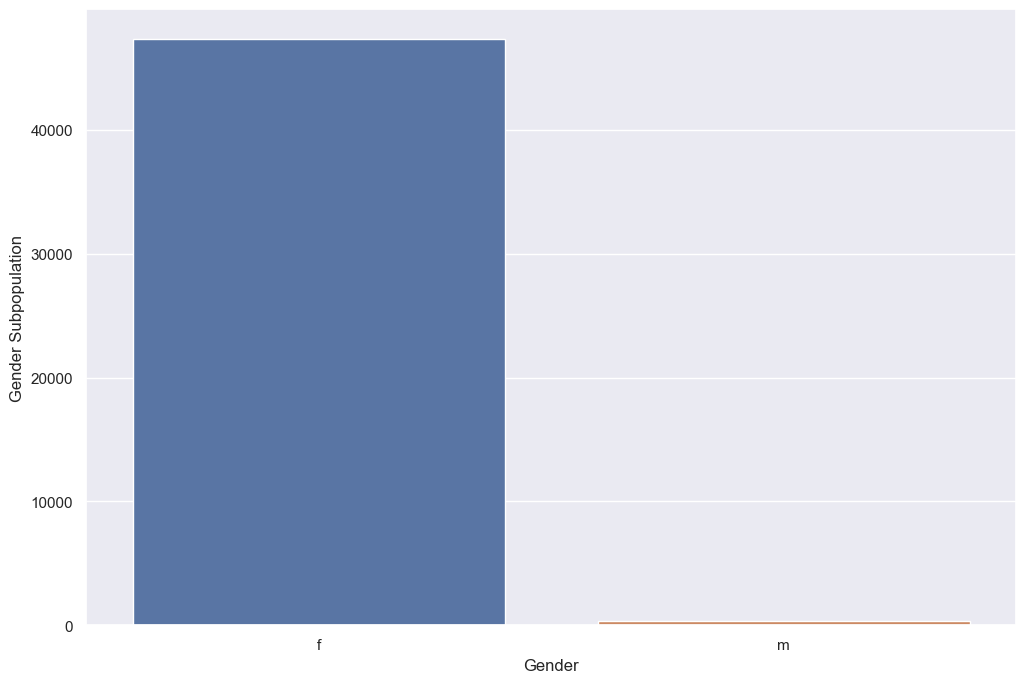

In [28]:
#Visualize Target_Gender - how jewellery is distributed
plt.figure(figsize = (12,8))

sns.countplot(data = df, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()


In [29]:
# Jewelry Category analysis
df["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [30]:
#Only few info makes sense of the data-, so eliminate data not needed like the numbers
df["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [31]:
# Extract the actual categories
categories = df["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [32]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [33]:
#Pick out authentic data based on categories
real_categories = df.loc[df["Category"].isin(categories)]

In [34]:
#Percentage of missing values
100 * df.isnull().sum() / len(df)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
Sku_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Branch_ID          4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [35]:
#Percentage of missing values fixed
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
Sku_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Branch_ID          4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

# a large part of the corruption in the data is due to one of the feature corrupted- Category feature

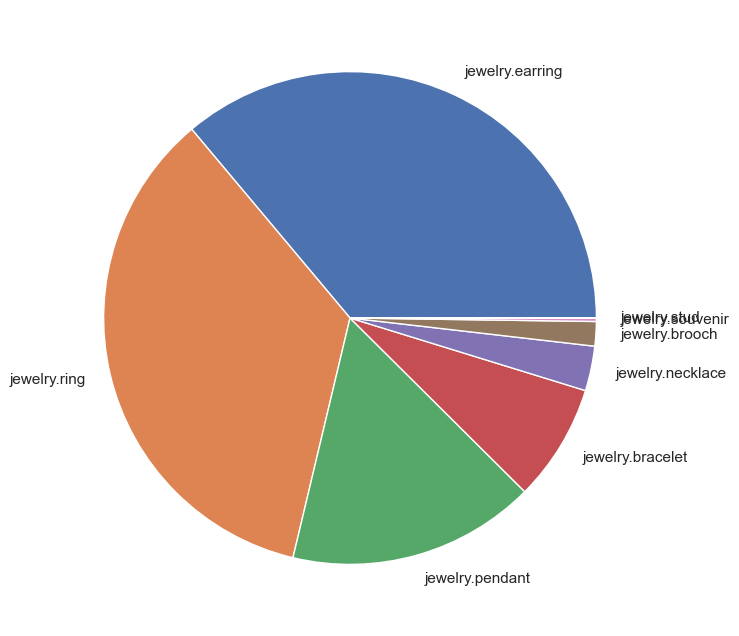

In [37]:
#Visualize jewelry Category feature
subdf = real_categories["Category"].value_counts()

jewelry_categories, counts = subdf.index.tolist(), subdf.values.tolist()

plt.figure(figsize = (12,8))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(); plt.close()

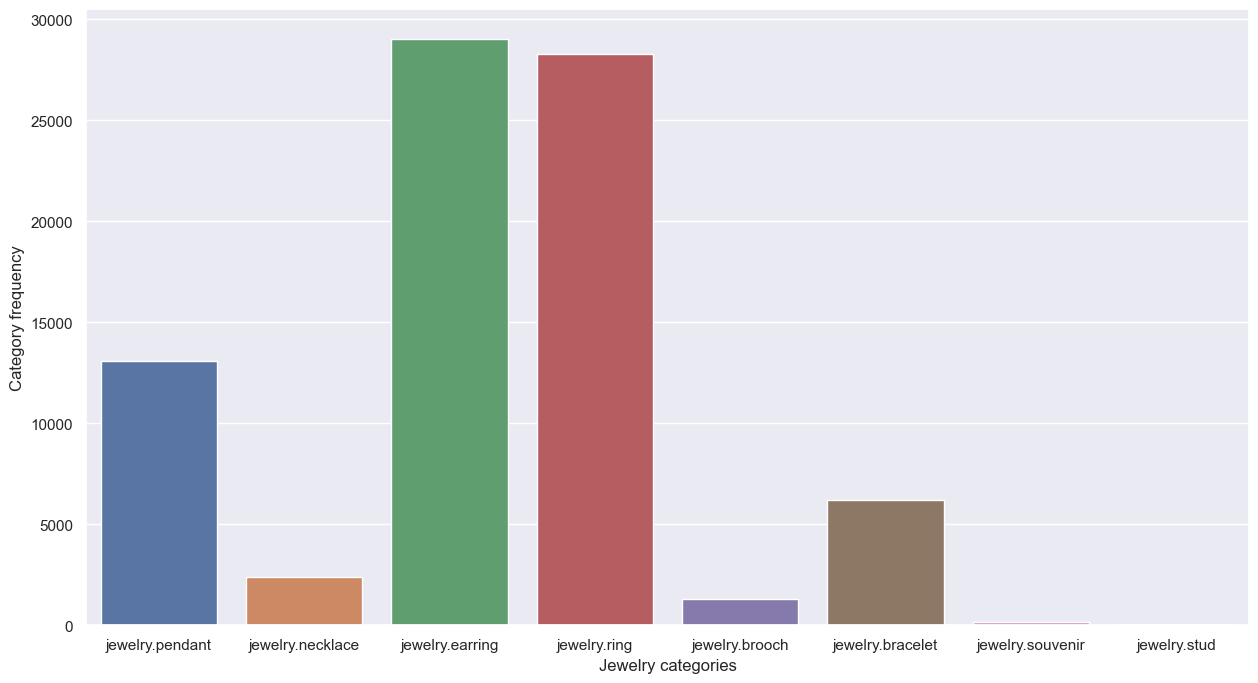

In [38]:
#Category feature in countplot
plt.figure(figsize = (15,8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

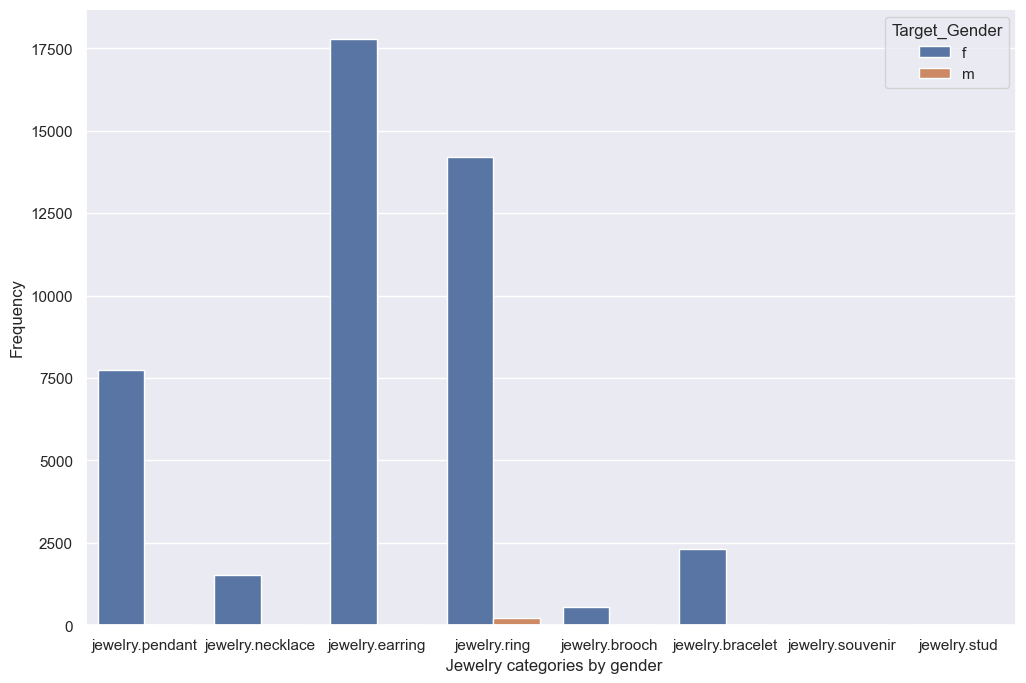

In [39]:
#Jewelry Category by gender

plt.figure(figsize = (12,8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel(" Jewelry categories by gender")
plt.ylabel("Frequency")

plt.show(); plt.close()
           

# Sales of Jewelry ring mainly  to the male. The business can develop other category of Jewel to the males as the chart above that the 
# female gender has more users in the different varieties of Jewelleries.

In [41]:
# Gender skew in original data
df["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [42]:
# Gender skew in original data
real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [43]:
# Encoding Jewelry Categories- Category

encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [44]:
# Encoding Jewelry Categories- Target_Gender

encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [45]:
# Encoding Jewelry Categories- Main_Gem

encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [46]:
# Encoding Jewelry Categories- Main_Color

encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [47]:
# Encoding Jewelry Categories- Main_Metal

encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [48]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,Sku_Quantity,Category_ID,Category,Branch_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [49]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   Sku_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Branch_ID       76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  object 
 12  Main_Gem        80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


In [50]:
real_categories.head(3)

,Order_Datetime,Order_ID,Product_ID,Sku_Quantity,Category_ID,Category,Branch_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2


In [51]:
# Generate Correlation matrix
# Spearman rank method-for calculating correlation that works best for categorical feature, for numeric feature use pearson co-efficient
#Using spearman rank correlation co-efficient

correlations = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_ID"], axis = 1).corr(method = "spearman")

In [52]:
correlations

,Sku_Quantity,Category_ID,Category,Branch_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
Sku_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Branch_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


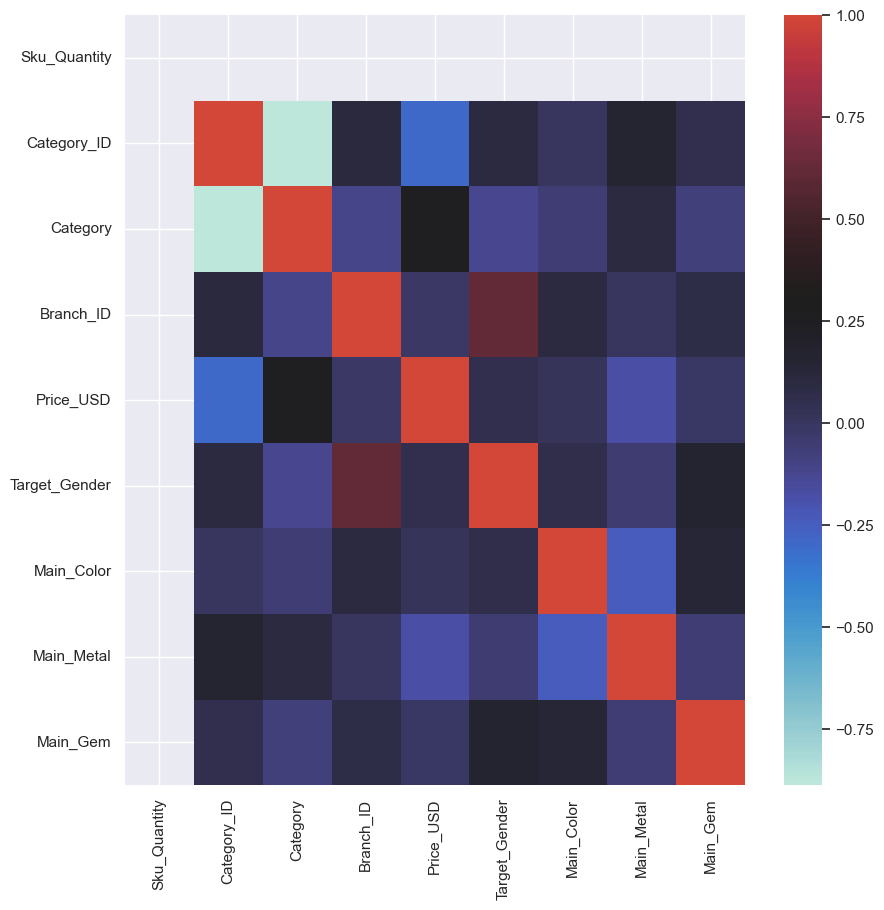

In [53]:
#Correlation heatmap- to visualize, it shows correlation from weak to moderate correlation
plt.figure(figsize = (10,10))

sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

In [54]:
# Set Correlation limit
upper = 1
lower = .2

In [55]:
#Explicitly obtain correlated feature
correlated_columns = {
    column: correlations[(correlations[column] > lower) & ( upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [56]:
correlated_columns

{'Sku_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Branch_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Branch_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

# Summary of findings
1. There are missing values in the dataset, can be fixed by inputting values
2. Data corruption in jewelry category feature
3. Rare values- column "Target_Gender" has the "male" with rare values which can be the reflection from the distribution of data.
4. Low cardinality or feature invariance- The SKU_Quantity feature has only one unique value,no new information added.
5. Target Skew- Target variable is right skewed, this can present issues during training of the dataset.
6. Correlation-Target variable exhibits a low correlation with independent variable.

# Data Preparation

# Based on observation from the exploration of the dataset, the following will be done in the data preparation stage

1.Missing value- replace missing value with mean or median
2.Feature Encoding- Categorical value will be encoded
3.Redundant feature will be eliminated, such as SKU_Quantity, Order_ID, Product_ID,Order_Datetime
4.Target Skew- The target variable is strongly right-skewed- this can resolved by using the TransformedTargetRegressor

Using Sci-kit learn;

Summary steps in Data preparation;

1.Eliminate features not required.
2.Extra records in actual categories
3.Encode categorical features (if required)
4.Account for target skew
5.fix missing values


In [60]:
df.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'Sku_Quantity',
       'Category_ID', 'Category', 'Branch_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [61]:
# Columns to eliminate
columns_to_eliminate = [
    "Sku_Quantity",
    "Order_ID",
    "Product_ID",
    "User_ID",
    "Category_ID",
    "Order_Datetime"
]

In [62]:
#Eliminate unused features
df.drop(labels = columns_to_eliminate, axis = 1,inplace = True)

In [120]:
df.head()

,Category,Branch_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [122]:
#Eliminate unrealistic categories - rows corrupted- a chunk of data corrupted
df = df.loc[df["Category"].isin(categories), :]

In [124]:
df.shape

(80458, 7)

# Split Data into Training and Testing Sets

In [127]:
from sklearn.model_selection import train_test_split

In [129]:
#Separate features from Labels
X, y = df.drop(labels = ["Price_USD"], axis = 1), df["Price_USD"]

In [133]:
#Create test and train splits

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = .1)

# Data Modelling


1.Linear Regression
2.Extremely Random Forest (ExtraTrees)
3.Adaptive Boosting(AdaBoost), and
4.Catboost

# Summary Steps
1.Encode Categorical features-if required
2.Account for target skew
3.Fix missing values

In [145]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
#from catboost import CatBoostRegressor


In [ ]:

#def generate_pipeline(model, column_indices, categorical_indices